# Notebook 1: EDA y Preprocesado (MovieLens 1M)

En este notebook realizamos:

- Carga de los datos procesados del Notebook 0  
- Exploratory Data Analysis (EDA)
- Distribuciones básicas de ratings, usuarios y películas  
- Comprobación de sparsity  
- Filtrado mínimo de actividad (si procede)
- División en train/test (holdout o leave-one-out)

Esto servirá como base para los modelos baseline y para los experimentos de reducción de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

# Carga de datos procesados del Notebook 0

In [2]:
data_path = Path("../data/processed")

ratings = pd.read_csv(data_path / "ratings.csv")
users = pd.read_csv(data_path / "users.csv")
movies = pd.read_csv(data_path / "movies.csv")

ratings.head(), users.head(), movies.head()

(   userId  movieId  rating  timestamp
 0       1     1193       5  978300760
 1       1      661       3  978302109
 2       1      914       3  978301968
 3       1     3408       4  978300275
 4       1     2355       5  978824291,
    userId gender  age  occupation    zip
 0       1      F    1          10  48067
 1       2      M   56          16  70072
 2       3      M   25          15  55117
 3       4      M   45           7  02460
 4       5      M   25          20  55455,
    movieId                               title                        genres
 0        1                    Toy Story (1995)   Animation|Children's|Comedy
 1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
 2        3             Grumpier Old Men (1995)                Comedy|Romance
 3        4            Waiting to Exhale (1995)                  Comedy|Drama
 4        5  Father of the Bride Part II (1995)                        Comedy)

# Dimensiones básicas

In [3]:
ratings.shape, users.shape, movies.shape

((1000209, 4), (6040, 5), (3883, 3))

# Estadísticas descriptivas de ratings

In [4]:
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

### Distribución de ratings

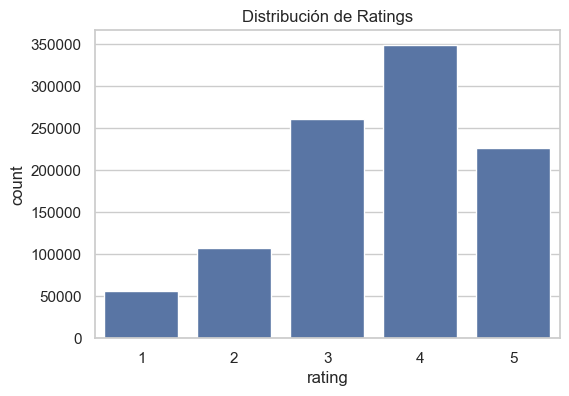

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x="rating", data=ratings)
plt.title("Distribución de Ratings")
plt.show()

# Actividad de usuarios
- Histograma de nº de ratings por usuario
- Cálculo de percentiles

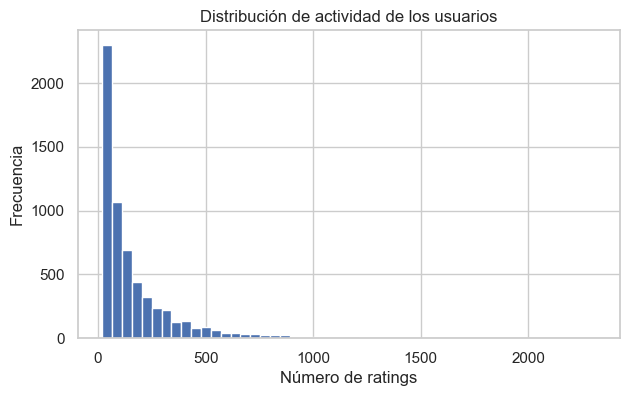

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
50%        96.000000
90%       400.000000
95%       556.000000
99%       906.660000
max      2314.000000
Name: rating, dtype: float64

In [6]:
user_activity = ratings.groupby("userId")["rating"].count()

plt.figure(figsize=(7,4))
plt.hist(user_activity, bins=50)
plt.title("Distribución de actividad de los usuarios")
plt.xlabel("Número de ratings")
plt.ylabel("Frecuencia")
plt.show()

user_activity.describe(percentiles=[0.5,0.9,0.95,0.99])

# Actividad de películas

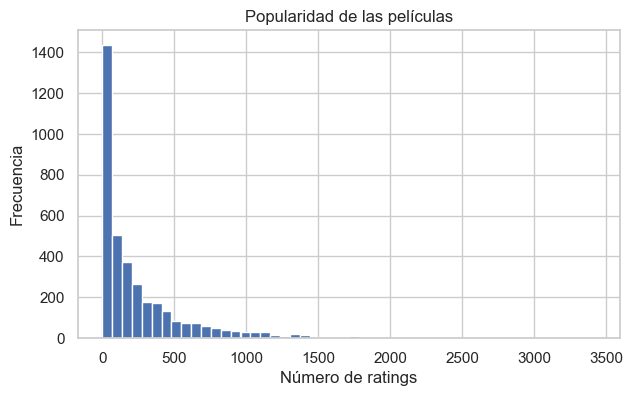

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
50%       123.500000
90%       729.500000
95%      1051.500000
99%      1784.900000
max      3428.000000
Name: rating, dtype: float64

In [7]:
movie_popularity = ratings.groupby("movieId")["rating"].count()

plt.figure(figsize=(7,4))
plt.hist(movie_popularity, bins=50)
plt.title("Popularidad de las películas")
plt.xlabel("Número de ratings")
plt.ylabel("Frecuencia")
plt.show()

movie_popularity.describe(percentiles=[0.5,0.9,0.95,0.99])

# Sparsity de la matriz usuario×item

In [8]:
num_users = ratings['userId'].nunique()
num_items = ratings['movieId'].nunique()

num_interactions = len(ratings)
matrix_size = num_users * num_items

sparsity = 1 - (num_interactions / matrix_size)

num_users, num_items, sparsity

(6040, 3706, 0.9553163743776871)

# División Train / Test

Usamos **leave-one-out por usuario**, un método común en recomendación. Para cada usuario, se toma **una sola valoración** como **test** y el resto se deja en **train**. Esto permite evaluar si el modelo puede recuperar ese ítem real entre sus recomendaciones. Es simple, eficiente y funciona bien incluso con matrices muy dispersas.


In [9]:
ratings_sorted = ratings.sort_values(["userId","timestamp"])

test = ratings_sorted.groupby("userId").tail(1)
train = ratings_sorted.drop(test.index)

train.shape, test.shape

((994169, 4), (6040, 4))

# Guardado de la división para modelos posteriores

In [10]:
train.to_csv(data_path / "train.csv", index=False)
test.to_csv(data_path / "test.csv", index=False)

print("Train/Test guardados correctamente.")

Train/Test guardados correctamente.
